   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

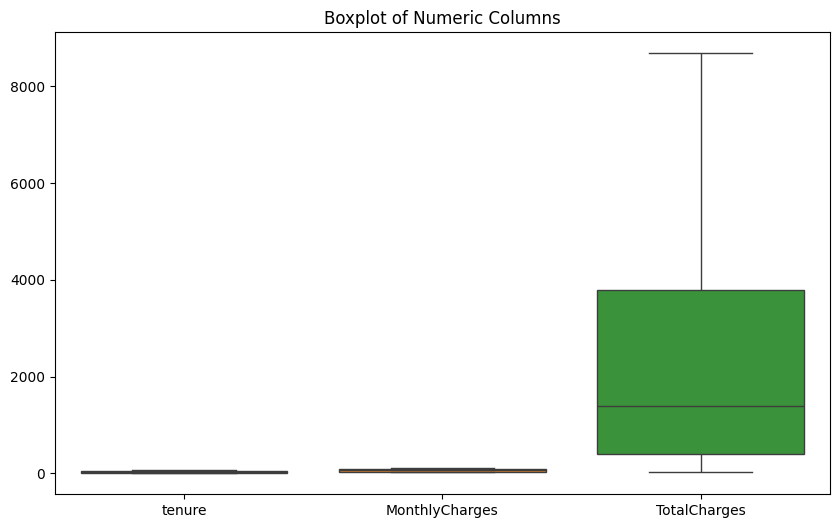

Cleaned dataset saved as 'Cleaned_Telecom_Customer_Churn.csv'.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("C:/Users/DELL/Downloads/Telecom_Customer_Churn.csv")

# Explore dataset
print(df.head())
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

# Handle missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.fillna(df.median(numeric_only=True), inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Standardize categorical columns
df['gender'] = df['gender'].str.strip().str.capitalize()
df['PaymentMethod'] = df['PaymentMethod'].replace({'electronic check': 'Electronic Check', 'mailed check': 'Mailed Check'})

# Convert columns to appropriate types
df['SeniorCitizen'] = df['SeniorCitizen'].astype(bool)
df['Churn'] = df['Churn'].astype(bool)

# Visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['tenure', 'MonthlyCharges', 'TotalCharges']])
plt.title("Boxplot of Numeric Columns")
plt.show()

# Cap outliers
df['MonthlyCharges'] = df['MonthlyCharges'].clip(lower=df['MonthlyCharges'].quantile(0.05),upper=df['MonthlyCharges'].quantile(0.95))

# Create tenure groups
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 60, 72], 
                            labels=['0-12', '12-24', '24-48', '48-60', '60+'], right=False)

# Scale numeric features
scaler = StandardScaler()
df[['MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['MonthlyCharges', 'TotalCharges']])

# Split dataset
X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save cleaned dataset
df.to_csv("Cleaned_Telecom_Customer_Churn.csv", index=False)
print("Cleaned dataset saved as 'Cleaned_Telecom_Customer_Churn.csv'.")
